In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from astropy.coordinates import SkyCoord
from astropy import units as u

In [5]:
df_all_model = pd.read_parquet('../scripts/nway_csc21_gaia3_full_neg_study_dis_niter200.parquet')

In [3]:
from joblib import load

benchmark_ids = load('../scripts/jobs/models/neg_study_dis_niter200_withint_with_int_5X_lgbm_0-3_20241113_235113/benchmark_ids.joblib')

In [6]:
df_test = df_all_model[df_all_model['csc21_name'].isin(benchmark_ids)]

Interpolated value at y=0.0176: 0.3528429561477124


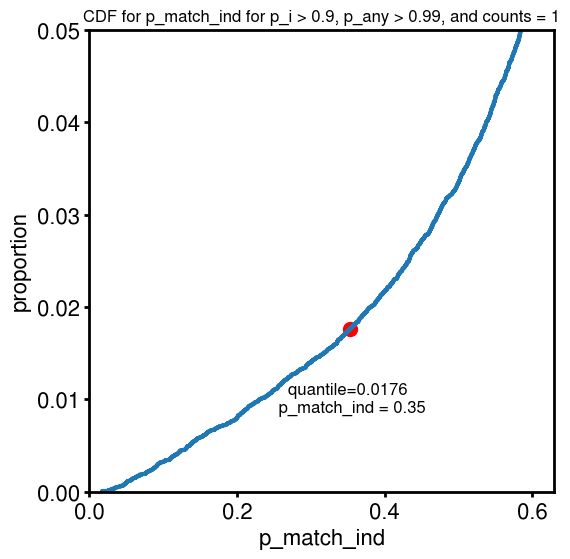

In [8]:
#### Threshold

# set plot parameters
plt.rcParams['font.family'] = 'Nimbus Sans'
plt.rcParams['font.size'] = 16 
plt.rcParams['axes.linewidth'] = 2  
plt.rcParams['xtick.major.width'] = 2  
plt.rcParams['ytick.major.width'] = 2 

# filter dataframe
filtered_df = df_all_model[(df_all_model['p_i'] == 1) & (df_all_model['p_any'] > 0.99) & (df_all_model['count'] == 1) & (df_all_model['separation'] < 3)]

# plot cdf
fig, ax = plt.subplots(figsize=(6, 6))
sns.ecdfplot(filtered_df['p_match_ind'], linewidth=3, ax=ax)
plt.title('CDF for p_match_ind for p_i > 0.9, p_any > 0.99, and counts = 1', fontsize=12)
plt.xlabel('p_match_ind')
plt.ylabel('proportion')
plt.xlim(0, 0.63)
plt.ylim(0, 0.05)

# Interpolate the value at y=0.01
y_value = 0.0176
x_value = np.interp(y_value, np.linspace(0, 1, len(filtered_df['p_match_ind'])), np.sort(filtered_df['p_match_ind']))
ax.scatter(x_value, y_value, color='red', s=100)
#x_value = np.percentile(filtered_df['p_match_ind'], 1)
print(f"Interpolated value at y={y_value}: {x_value}")
plt.annotate(f'quantile=0.0176 \n p_match_ind = {x_value:.2f}', (x_value, y_value), textcoords="offset points", xytext=(0, -60), ha='center', fontsize=12)
plt.show()
